# SciView

# 1) Preprocess millions of documents

## 1.1) Libraries and Paths

In [1]:
# Load packages
from Functions.F1_Subsets_and_PreProcessing import DOI_Path_Dictionary, Random_DOI_Path_Pair, Dict_Loader, Preprocessed_Dict_and_Metadata
# from Functions.F2_Model_Building import path_creator, log_printer
import pickle
# import pickle5 as pickle
import pandas as pd
import gensim
import time
# import pyLDAvis.gensim_models
import gc
# import memory_profiler as mem_profile
import os

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
from modelConfig_0_99 import *
# with open('modelConfig_0_99.py', 'r') as f:
#     print(f.read())

## 1.2) Create DOI - filepath dictionaries
A dictionary is created for every directory containing up to 100'000 text files. The dictionary maps the full path, which is the directory and the DOI (filename) as a value to just the doi (filename) as a key. This then allows then the retrieval of a text file based on a DOI.

Every article text file name is the corresponding DOI of the file itsel. The files are further saved under specific directories and therefore in order to load a specific file via the DOI the full path has to known. The DOI-filepath dictionary store the DOI as a key and the full path as a value.

Depending on the progress the start and end directory has to adapted above, check the values accordingly:

In [7]:
# Set the dirs to save doi and paths
DOI2PathDict_StartDir=400
DOI2PathDict_EndDir=599

In [8]:
# Iterate trough data directories
for dirNum in range(DOI2PathDict_StartDir,DOI2PathDict_EndDir+1):

    # Bring for example 27 into the form of "027"
    dirNum=str(dirNum).zfill(3)

    # Define Path for saving
    saveName=(IntermediateData_Path + dirNum + DOIPath_Suffix).replace(" ","")

    # create a binary pickle file 
    f = open(saveName,"wb")

    # Create dictionary
    doiPathDict=DOI_Path_Dictionary(dirNum, DataPath)

    print("Lengt: ", len(doiPathDict), "of dirNum: ", dirNum)

    # write the python object (dict) to pickle file
    pickle.dump(doiPathDict,f)
    
    # close file
    f.close()

Lengt:  99992 of dirNum:  400
Lengt:  99251 of dirNum:  401
Lengt:  99995 of dirNum:  402
Lengt:  99996 of dirNum:  403
Lengt:  99991 of dirNum:  404
Lengt:  99993 of dirNum:  405
Lengt:  99993 of dirNum:  406
Lengt:  99998 of dirNum:  407
Lengt:  99996 of dirNum:  408
Lengt:  99997 of dirNum:  409
Lengt:  99993 of dirNum:  410
Lengt:  99999 of dirNum:  411
Lengt:  99996 of dirNum:  412
Lengt:  99997 of dirNum:  413
Lengt:  99981 of dirNum:  414
Lengt:  99999 of dirNum:  415
Lengt:  100000 of dirNum:  416
Lengt:  99994 of dirNum:  417
Lengt:  99991 of dirNum:  418
Lengt:  99993 of dirNum:  419
Lengt:  99984 of dirNum:  420
Lengt:  99980 of dirNum:  421
Lengt:  99979 of dirNum:  422
Lengt:  99902 of dirNum:  423
Lengt:  99997 of dirNum:  424
Lengt:  99987 of dirNum:  425
Lengt:  99997 of dirNum:  426
Lengt:  99989 of dirNum:  427
Lengt:  99994 of dirNum:  428
Lengt:  99998 of dirNum:  429
Lengt:  99989 of dirNum:  430
Lengt:  99992 of dirNum:  431
Lengt:  99966 of dirNum:  432
Lengt:  9

## 1.3) Integrity check of created dictionary
Check if the DOI - file path dictionaries are correctly mapped by reading part of the retrieved text and comparing it through a web search of the give DOI

In [7]:
# Define specific doiPath dictionary which is used for the integrity check
doiPathDict_Path=("Y:\\IntermediateData\\003_DOI_Path_Dict.pkl")

In [8]:
# Load the DOI-Path dictionary
with open(doiPathDict_Path, 'rb') as handle:
    doiPathDict=pickle.load(handle)

# Feed the dictionary to the function which returns a random DOI-Path pair
Random_DOI_Path_Pair(doiPathDict)

The random pair is : ('10.1002/ajim.10171', 'Y:\\Data\\00300000\\10.1002\\ajim.10171.txt')
AMERICAN JOURNAL OF INDUSTRIAL MEDICINE 43:149–155 (2003)

Occupation and Smoking as Risk Factors fo


## 1.4) Preprocess documents
Multiprocessing does not work in jupyter notebook (https://stackoverflow.com/questions/23641475/multiprocessing-working-in-python-but-not-in-ipython/23641560#23641560). Therefore the PreProcessing of the documents is in the **Functions.Preprocess_with_Multiprocessing.py** file (one directory is processed in approx. 0.5h)

The execution **without** multiporcessing is defined below (one directory is processed in approx. 3.5h)

Adapt start and enddir because it can be different than defined in the modelConfig file

In [1]:
# Load packages
from Functions.F1_Subsets_and_PreProcessing import Preprocessed_Dict_and_Metadata, Dict_Loader, Chunks
import pickle
import pandas as pd
# import multiprocessing as mp
import multiprocess as mp
import gc
import time

#----------------------------------------#
# If the conda environment does not get correctly activated (e.g. import gensim is not working)
# https://stackoverflow.com/questions/56623269/cmd-warning-python-interpreter-is-in-a-conda-environment-but-the-environment
#----------------------------------------#

# Define input paths and file names
IntermediateData_Path="Y:\\IntermediateData\\"
doiPath_Suffix="_DOI_Path_Dict.pkl"

# Define Output paths and file names
IntermediateData_Path="Y:\IntermediateData\ "
FtPr_Suffix="_FtPr.pkl"
MetaData_Suffix="_MetaData.pkl"
encodeError_Suffix="_errEnc.pkl"

# Set the dirs to save doi and paths
StartDir=223
EndDir=299

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# Iterate trough data directories
for dirNum in range(StartDir,EndDir+1):

    tic = time.perf_counter()

    #Load the dict
    dictItem=Dict_Loader(dirNum, IntermediateData_Path, doiPath_Suffix)  
    print("Length of dictionary num:", dirNum, "is", len(dictItem),"First two keys are:", list(dictItem.keys())[0:2])

    # Init a list which slices the dictionary into multiple dictionaries (each a chunk af 10000)
    slicedDictList=[]
    # Create and append dictionary chunks
    for item in Chunks(dictItem, 10000):
        slicedDictList.append(item)
        print("Length of the slice is:",len(item), "First two keys of the slice are:", list(item.keys())[0:2])

    # Process each dictionary chunk
    print("Available cores: ",mp.cpu_count(), "(Pool = amount of cores)")
    pool = mp.Pool(processes=10)
    print("pool with 10 processes")
    Return=pool.map(Preprocessed_Dict_and_Metadata, slicedDictList)
    pool.close
    print("Preprocess the text files of dirNum: ", dirNum)

    # Append Metadata
    slicedMetaDataList=[]
    for item in Return:
        slicedMetaDataList.append(item[0])
    metaData = pd.concat(slicedMetaDataList)

    # Append preprocessed text Dictionaries
    FtPr={}
    for item in Return:
        FtPr.update(item[1])

    # Append encoidng error dicitonaries
    encErr={}
    for item in Return:
        encErr.update(item[2])

    # Create name for the metaData
    # Bring for example 27 into the form of "027"
    dirNum=str(dirNum).zfill(3)
    # Create path to dictionary
    metaDataName=(IntermediateData_Path + dirNum + MetaData_Suffix).replace(" ","")
    FtPrName=(IntermediateData_Path + dirNum + FtPr_Suffix).replace(" ","")
    encErrName=(IntermediateData_Path + dirNum + encodeError_Suffix).replace(" ","")

    # Store the returned elements
    # create a binary pickle file 
    a = open(FtPrName,"wb")
    # write the python object (dict) to pickle file
    pickle.dump(FtPr,a)
    # close file
    a.close()

    # Store the returned elements
    # create a binary pickle file 
    b = open(encErrName,"wb")
    # write the python object (dict) to pickle file
    pickle.dump(encErr,b)
    # close file
    b.close()

    # Save dataframe of metaData
    metaData.to_pickle(metaDataName)

    # #Try delete large dataframe (Prevent memory loss error)
    del(FtPr)
    del(metaData)
    gc.collect()

    toc = time.perf_counter()
    print("Processing of dirNum: ", dirNum, " took: ", (toc-tic)/60, " minutes") 

Length of dictionary num: 223 is 99986 First two keys are: ['10.0000/opticsinfobase.org/as-49-8-1142', '10.1001/archderm.1959.01560190029004']
Length of the slice is: 10000 First two keys of the slice are: ['10.0000/opticsinfobase.org/as-49-8-1142', '10.1001/archderm.1959.01560190029004']
Length of the slice is: 10000 First two keys of the slice are: ['10.1063/1.1700289', '10.1063/1.438155']
Length of the slice is: 10000 First two keys of the slice are: ['10.1126/science.50.1303.559', '10.1126/science.ns-16.401.206-e']
Length of the slice is: 10000 First two keys of the slice are: ['10.1126/science.122.3169.554', '10.1126/science.18.457.444']
Length of the slice is: 10000 First two keys of the slice are: ['10.1126/science.5.128.913', '10.1126/science.ns-4.86.308']
Length of the slice is: 10000 First two keys of the slice are: ['10.1126/science.60.1562.523', '10.1126/science.ns-10.248.225']
Length of the slice is: 10000 First two keys of the slice are: ['10.1126/science.105.2733.514', '

## 1.5) Define meta data filter parameters

In [4]:
MetadirNum=8

In [7]:
Meta_Path=(IntermediateData_Path + str(MetadirNum).zfill(3) + MetaData_Suffix).replace(" ","")
print(Meta_Path)
Meta=pd.read_pickle(Meta_Path)

Y:\IntermediateData\008_MetaData.pkl


In [103]:
Meta.columns

Index(['DOI', 'Token Amount', 'Language'], dtype='object')

In [104]:
Meta["Language"]=[str(languageObject[0]) for languageObject in Meta["Language"]]
Meta["Language"]=Meta["Language"].str.replace('\d+', '')
Meta["Language"]=Meta["Language"].str.replace('.', '')
Meta["Language"]=Meta["Language"].str.replace(':', '')

C:\Users\sebas\anaconda3\envs\SciView\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\sebas\anaconda3\envs\SciView\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes


In [105]:
Meta["Language"].value_counts()

en    78097
de    21816
n        74
ca        6
it        2
sv        1
cy        1
Name: Language, dtype: int64

<AxesSubplot:>

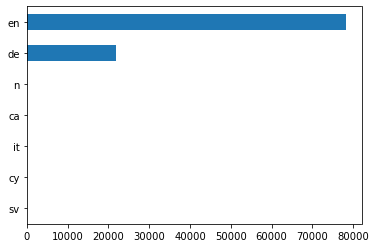

In [106]:
Meta["Language"].value_counts().sort_values().plot(kind = 'barh')

In [107]:
Meta["Token Amount"].max()

90100

<AxesSubplot:>

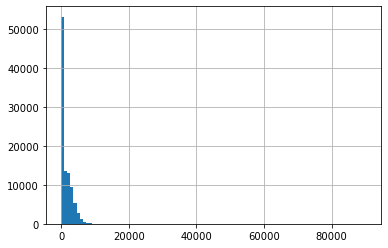

In [108]:
Meta["Token Amount"].hist(bins=100)

<AxesSubplot:>

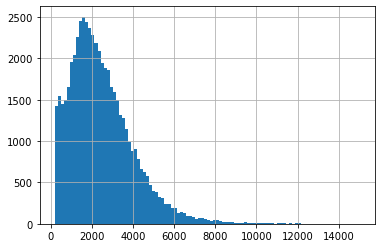

In [109]:
minTokenN=200
maxTokenN=15000
Meta["Token Amount"].hist(bins=100,range=(minTokenN,maxTokenN))

defined filters

In [ ]:
minTokenN=200
maxTokenN=15000
language="en"

## 1.X) Create filtered preprocessing meta data files -> Delete?
This only has to be applied if the filtered meta data is not yet created

In [12]:
MetaStartDir=200
MetaEndDir=399

In [ ]:
# Start Global Timer which times the whole function
tic = time.perf_counter()

# Apply the Phrases model
for dirNum in range(MetaStartDir,MetaEndDir+1):

    print("Processing dirNum:", dirNum)
    
    # Load MetaData
    Meta_Path=(IntermediateData_Path + str(dirNum).zfill(3) + MetaData_Suffix)
    Meta=pd.read_pickle(Meta_Path)

    # Transform Language column
    Meta["Language"]=[str(languageObject[0]) for languageObject in Meta["Language"]] # -> Up until dirNum 173 (see below)
    # Meta["Language"]=[str(languageObject) for languageObject in Meta["Language"]]
    Meta["Language"]=Meta["Language"].str.replace('\d+', '', regex=True)
    Meta["Language"]=Meta["Language"].str.replace('.', '', regex=True)
    Meta["Language"]=Meta["Language"].str.replace(':', '', regex=True)

    # Get filtered DOI List
    Meta=Meta[(Meta["Token Amount"] > minTokenN) & (Meta["Token Amount"] < maxTokenN) & (Meta["Language"]==language)]
    Meta.head(1)

    # Save the meta data each iteration
    metaDataName=(IntermediateData_Path + str(dirNum).zfill(3)  + MetaDataFiltered_Suffix).replace(" ","")
    Meta.to_pickle(metaDataName)

    print(dirNum, "processed")

#Stop global timer and print
toc = time.perf_counter()
print("Time elapsed in seconds: ", round(toc-tic,4), ", in minutes ", round((toc-tic)/60,4), ", in hours: ", round((toc-tic)/3600,4))


### 1.6.1) Issue on changing dataframe structure after dir 173

**16.08.2022**

Things to note regarding the preprocessing step:
* The creation of the errEnco/MetaData/FtPr was done with computer 1 up until dir 173. The creation of the errEnco/MetaData/FtPr was done with computer 2 after dir 173.
* Altough computer 1 had memory issues it created much less exceptions (smaller errEnc file size) than computer 2.

-> Evtl. troubleshoot this issue or reprocess up until dir 173 with the second computer and accept higher encoding errors.

---
**16.08.2022**

When the computer 2 was used a different Python and Pandas version was used and the a append function was replaced with the concat function. This led then to the following issue:
* Up until the dirNum 173 the Preprocessing Meta Data Dataframe was created in which the lanugage value was set in "[]" as can be seen below


    DOI	Token Amount	Language
    0	10.1016/s0022-3468(83)80539-9	586	[en:0.9999976751225605]
    1	10.1016/s0016-7878(45)80041-x	248	[en:0.999996591777685]
    2	10.1016/s0021-8707(35)90287-8	1991	[en:0.9999966452519942]
    3	10.1016/s0022-1031(03)00026-x	3239	[en:0.9999989251953788]
    4	10.1016/s0022-3468(03)00434-2	653	[en:0.9999975477179655]
    ...	...	...	...
    99995	10.1016/s0022-3468(98)90253-6	1421	[en:0.9999962280793104]
    99996	10.1016/s0016-7037(03)00451-4	6240	[en:0.9999960453506587]
    99997	10.1016/s0015-1882(97)87269-2	687	[en:0.9999959557447808]
    99998	10.1016/s0021-8502(97)00033-5	3406	[en:0.9999971044331658]
    99999	10.1016/s0014-5793(02)02873-9	2250	[en:0.9999972211114307]
    100000 rows × 3 columns


* After the change it was create in the following manner


    DOI	Token Amount	Language
    0	10.1016/s0026-0495(99)90151-8	2563	en:0.9999973893097882
    0	10.1016/s0041-3879(20)80052-x	1669	en:0.9999950641026178
    0	10.1016/s0031-9201(96)03201-3	6186	en:0.9999982788575781
    0	10.1016/s0041-1345(97)00174-7	401	en:0.999996560652319
    0	10.1016/s0029-7844(00)00862-0	1349	en:0.9999949191167743
    ...	...	...	...
    0	10.1016/s0033-3506(97)90010-x	2526	en:0.9999969939152169
    0	10.1016/s0040-1951(96)00136-9	3081	en:0.9999981893456339
    0	10.1016/s0039-9140(06)00610-2	1049	en:0.9999968353600166
    0	10.1016/s0042-6989(96)00277-5	3042	en:0.9999978922699043
    0	10.1016/s0031-9384(97)00015-2	5062	en:0.9999974074112503
    100795 rows × 3 columns

* Therefore it can be accessed directly (e.g. without [0])

-> Evtl. reprocess everything up to dir 173 (Needed if the language column accross all directories needs to be accessed)

---
**17.08.2022**

The preprocessing has been running with Computer 2 and the same python envrionment as computer 1. And the same memory issues as with computer 1 happened (I assumed that it was more a limitation of the harware on computer 1)

Two options are available
- Use the newer Python environment from Computer 2 and use it as the new also for computer 1 (Redo everything in intermediate_data directory for safety)
- Use the newer Envrionment on computer 2 but limit the pickle protocol to 4 in order to make it compatible with the older Python environment on computer 1

-> The first option was chosen!


# 2) Reference database transformation and alignment

Here the unpaywall reference database is transformed into a Pandas dataframe and then merged withe preprocessing meta data. The merged dataframes can then be used as a sampling reference.
The download of the unpaywall data dump is a prerquisite and not shown in this notebook

## 2.1) Libraries and Paths

In [1]:
import jsonlines
import time
import pandas as pd
import os
import dask.dataframe as dd
import time
import pickle
from Functions.F2_Reference_Databases_and_Alignment import Clean_Joined_Df, Sankey_Dataframe, Sankey_DataFlow_Graph
import numpy as np
import plotly.graph_objects as go
import plotly.express as pex
import matplotlib.pyplot as plt

In [2]:
# Define input paths and file names
IntermediateData_Path="Y:\\IntermediateData\\"
MetaData_Suffix="_MetaData.pkl"
MetaDataFiltered_Suffix="_MetaDataFiltered.pkl"
logEntries=int(1e5) # Intervall of loging
path='Y:\\Reference_Databases\\unpaywall\\splitted'
csvPath='Y:\\Reference_Databases\\unpaywall\\xaa-xba.csv'
MetaDataJoined_Suffix="_MetaDataJoined.pkl"
LengthInfoDf_Suffix="_LengthInfoDf.pkl"
LengthInfoDf_Suffix2="_LengthInfoDf2.csv"

## 2.2) Process unpaywall dataset

Unziped the paywall file on the synology, then used the split command from wsl

    1. scidb init
    2. cd /mnt/share/Reference_Databases/unpaywall/
    3. gunzip unpaywall_snapshot_2022-03-09T083001.jsonl.gz or 
        or gzip -dk unpaywall_snapshot_2022-03-09T083001.jsonl.gz
        or on windows with the 7zip tool (Process file on computer then copy it to the NAS)
        or Unzipping happened on windows side with 7zip, then the unziped file was transferred
    4.split -l 5000000 unpaywall_snapshot_2022-03-09T083001.jsonl

    5.Create a the following directory

        'Y:\\Reference_Databases\\unpaywall\\splitted'

    6.And move all of splitted file into this directory

---

Turn all of the splitted .jsonl files into pickle files.

In [7]:
# All of the files of the directory are listed
fileNameList=os.listdir(path)

# The loop goes trough all the files
for fileName in fileNameList:

    # And interim filepath is created for loading the file
    filepath= path + "\\" + fileName

    # Several timers are setup in order track the processing performance
    tic1 = time.perf_counter()
    tic2 = time.perf_counter()
    tic3 = time.perf_counter()

    # Epmpty list is created to store the extracted data and column names are assigned
    list_of_dfs=[]
    df = pd.DataFrame(columns=["doi","year",'is_oa','publisher','journal_name'])

    # The jsonlines fucntions is used in order to read the file line by line
    with jsonlines.open(filepath) as f:

        # Each line of the json line file is iterated
        for index, item in enumerate(f):
                # print(item.keys())

                # If a specific amounts of lines is processed, the processing time is logged
                if (index+1) % logEntries == 0: # example log every 100000 lines (100000 entries = 0:999999 python index)
                    toc2 = time.perf_counter()
                    print('index = {}'.format(index)," | df appending time in minutes: ",(toc2-tic2)/60, " | Length of list of dfs: ", len(list_of_dfs))
                    tic2 = time.perf_counter()
                
                # An empty dataframe is created and then the data from the item (line) is assigned to the dataframe
                # The dataframe is then appended to the list of dataframes
                # If the item can not be processed an message is printed
                try:
                    df = pd.DataFrame(columns=["doi","year",'is_oa','publisher','journal_name'])
                    data={"doi":item["doi"], 'genre':item['genre'],"year":item['year'],'title':item['title'],
                                "is_oa":item['is_oa'], "publisher":item['publisher'], "journal_name":item['journal_name']}
                    df=df.append(data,ignore_index=True)
                    list_of_dfs.append(df)
                except:
                    print(index, " could not be processed")

    print("------------------")
    print("Saving to disk")

    # The list of dataframes is then concatenated and saved to disk
    df = pd.concat(list_of_dfs, ignore_index=True)
    df.to_pickle(path + "\\" + fileName +".pkl")

    # The processing time is logged and the loop is continued
    list_of_dfs=[]
    toc3 = time.perf_counter()
    timediff=(toc3-tic3)/60
    print("Processing time in minutes: ", timediff)
    tic3 = time.perf_counter()


index = 99999  | df appending time in minutes:  6.330623411666602  | Length of list of dfs:  99999
index = 199999  | df appending time in minutes:  6.299679376666608  | Length of list of dfs:  199999
index = 299999  | df appending time in minutes:  6.339668698333359  | Length of list of dfs:  299999
index = 399999  | df appending time in minutes:  5.888828686666966  | Length of list of dfs:  399999
index = 499999  | df appending time in minutes:  5.650169656666791  | Length of list of dfs:  499999
index = 599999  | df appending time in minutes:  6.339302228333448  | Length of list of dfs:  599999
index = 699999  | df appending time in minutes:  6.341847920000146  | Length of list of dfs:  699999
index = 799999  | df appending time in minutes:  6.250748905000122  | Length of list of dfs:  799999
index = 899999  | df appending time in minutes:  6.175039761666752  | Length of list of dfs:  899999
index = 999999  | df appending time in minutes:  5.632902556667007  | Length of list of dfs: 

## 2.3) Concatenate meta data files

In order to process the data in an memory efficient manner Dask is applied. Because Dask can not read pickle filetypes the concatenated pickle files are transformed into a single csv file.

In [3]:
# Get a list off all the unpaywall metadata .pkl files
fileNameList=os.listdir(path)
for name in fileNameList:
    if ".pkl" not in name:
        fileNameList.remove(name)
        print(name, "is removed")

xaa is removed
xab is removed
xac is removed
xad is removed
xae is removed
xaf is removed
xag is removed
xah is removed
xai is removed
xaj is removed
xak is removed
xal is removed
xam is removed
xan is removed
xao is removed
xap is removed
xaq is removed
xar is removed
xas is removed
xat is removed
xau is removed
xav is removed
xaw is removed
xax is removed
xay is removed
xaz is removed
xba is removed


First check if the file list is correct

In [4]:
fileNameList

['xaa.pkl',
 'xab.pkl',
 'xac.pkl',
 'xad.pkl',
 'xae.pkl',
 'xaf.pkl',
 'xag.pkl',
 'xah.pkl',
 'xai.pkl',
 'xaj.pkl',
 'xak.pkl',
 'xal.pkl',
 'xam.pkl',
 'xan.pkl',
 'xao.pkl',
 'xap.pkl',
 'xaq.pkl',
 'xar.pkl',
 'xas.pkl',
 'xat.pkl',
 'xau.pkl',
 'xav.pkl',
 'xaw.pkl',
 'xax.pkl',
 'xay.pkl',
 'xaz.pkl',
 'xba.pkl']

In [5]:
# Add the first file with headers to the csv file
df=pd.read_pickle(path +"\\"+ fileNameList[0])
df.to_csv(csvPath, mode='a', index=False, header=True)

# Append all file in the fileNameList into a single csv file
for name in fileNameList:
    df=pd.read_pickle(path+"\\"+name)
    df.to_csv(csvPath, mode='a', index=False, header=False)
    print(name, "is appended")

xaa.pkl is appended
xab.pkl is appended
xac.pkl is appended
xad.pkl is appended
xae.pkl is appended
xaf.pkl is appended
xag.pkl is appended
xah.pkl is appended
xai.pkl is appended
xaj.pkl is appended
xak.pkl is appended
xal.pkl is appended
xam.pkl is appended
xan.pkl is appended
xao.pkl is appended
xap.pkl is appended
xaq.pkl is appended
xar.pkl is appended
xas.pkl is appended
xat.pkl is appended
xau.pkl is appended
xav.pkl is appended
xaw.pkl is appended
xax.pkl is appended
xay.pkl is appended
xaz.pkl is appended
xba.pkl is appended


## 2.4) Read refernce database and align with preprocessing meta data

In [44]:
# Read the created csv file with dask
RefDf=dd.read_csv(csvPath, assume_missing=True) #some year dates are missing !!!

# show the amount of dask partitions
RefDf.npartitions

# Compute head
RefDf.head(n=5, npartitions=1, compute=True)

,doi,year,is_oa,publisher,journal_name,genre,title
0,10.1007/978-3-540-75404-6_41,NaN,True,Springer Berlin Heidelberg,Field and Service Robotics,book-chapter,Coordinated Search in Cluttered Environments U...
1,10.1515/phys-2018-0004,2018.0,True,Walter de Gruyter GmbH,Open Physics,journal-article,Design optimization of an axial-field eddy-cur...
2,10.21608/bjas.2020.136128,2020.0,True,Egypts Presidential Specialized Council for Ed...,Benha Journal of Applied Sciences,journal-article,Five Layers Repair in Management of Pilonidal ...
3,10.2223/jped.1597,2007.0,True,Jornal de Pediatria,Jornal de Pediatria,journal-article,Clinical value of lactate measurement and nucl...
4,10.3109/03639045.2013.767829,2013.0,False,Informa UK Limited,Drug Development and Industrial Pharmacy,journal-article,In vitroevaluation of the effects of various a...


Define Start and End directory for creating the joined and cleaned dataframe

In [45]:
StartDir=5
EndDir=199

The Filtered Preprocessing of the current directory is loaded and an inner join based on the doi to the reference database is performed. Then the CleanJoinedDf is applied to the joined dataframe.
The CleanJoinedDf function performs the following steps:
* Remove rows with titles which are not unique (All of the entries are deleted which are have a non unique title)
* Remove rows with dois which are not unique (All of the entries are deleted which are have a non unique doi)
* Missing values in the year and title column are deleted
* An additional column is added to the dataframe with the directory name
* Column names are renamed

In [ ]:
# Iterate trough data directories
for dirNum in range(StartDir,EndDir+1):

    # Create path to dictionary and read the preprocessed metadata file
    path=(IntermediateData_Path + str(dirNum).zfill(3) + MetaData_Suffix)
    # path=(IntermediateData_Path + str(dirNum).zfill(3) + MetaDataFiltered_Suffix)
    PpMetaDf=pd.read_pickle(path)

    # Transform Language column
    PpMetaDf["Language"]=[str(languageObject[0]) for languageObject in PpMetaDf["Language"]] # -> Up until dirNum 173 (see below)
    PpMetaDf["Language"]=PpMetaDf["Language"].str.replace('\d+', '', regex=True)
    PpMetaDf["Language"]=PpMetaDf["Language"].str.replace('.', '', regex=True)
    PpMetaDf["Language"]=PpMetaDf["Language"].str.replace(':', '', regex=True)

    #Harmonize Column Naming
    PpMetaDf.columns=["doi", "TokenAmount", "Language"]

    # Create inner join of the PpMetaDf and the RefDf
    join = RefDf.merge(PpMetaDf, how="inner", on=["doi"])
    tic = time.perf_counter()
    JoinedDf=join.compute()
    toc = time.perf_counter()
    print(toc-tic) 

    # Apply the CleanJoinedDf function to the dataframe
    LengthInfoDf, JoinedDf_Cleaned_4=Clean_Joined_Df(JoinedDf, dirNum)

    # Concatenate the LengthInfoDf with itself to create a dataframe with all the information if it is the first iteration
    if dirNum==StartDir:
        LengthInfoDf_All=LengthInfoDf
    else:
        LengthInfoDf_All=pd.concat([LengthInfoDf_All, LengthInfoDf], axis=0)

    # Save the joined and cleaned dataframe to a pickle file
    path=(IntermediateData_Path + str(dirNum).zfill(3) + MetaDataJoined_Suffix)
    JoinedDf_Cleaned_4.to_pickle(path)
    print(path, "is saved")

    print("Directory ", dirNum, "is done")

# Save the LengthInfoDf to a pickle file
path=(IntermediateData_Path + str(StartDir).zfill(3) + "_" + str(EndDir).zfill(3) + LengthInfoDf_Suffix)
LengthInfoDf_All.to_pickle(path)
print(path, "is saved")

# Save the LengthInfoDf to a csv file (without index)
path=(IntermediateData_Path + str(StartDir).zfill(3) + "_" + str(EndDir).zfill(3) + LengthInfoDf_Suffix2)
LengthInfoDf_All.to_csv(path, index=False)

### 3.4.1) Further tests and infos on the aligned dataframes

The RefDb seems to have doulbe entries for the same DOI (The CleanedJoinedDf function is able to deal with this)

In [ ]:
# Check if RefDb has double entries

doi="10.1002/(sici)1099-1387(199907)5:7<313::aid-psc200>3.0.co;2-f"
# Find the row in the RefDf dataframe which has the same doi as the doi variable
RefDf[RefDf["doi"]==doi].compute()
#                                                       doi    year  is_oa publisher                journal_name            genre                                              title
# 1043    10.1002/(sici)1099-1387(199907)5:7<313::aid-ps...  1999.0  False     Wiley  Journal of Peptide Science  journal-article  Assembly of binding loops on aromatic template...
# 244097  10.1002/(sici)1099-1387(199907)5:7<313::aid-ps...  1999.0  False     Wiley  Journal of Peptide Science  journal-article  Assembly of binding loops on aromatic template...

Load a MetaDataJoined dataframe and check if the doi and directory name can be used to retrieve the text file

In [13]:
path='Y:\\IntermediateData\\077_MetaDataJoined.pkl'
pathDOIPathDict='Y:\\IntermediateData\\077_DOI_Path_Dict.pkl'

In [20]:
# Load dataframe
df5=pd.read_pickle(path)

# Get the doi and data_dir value of the same random row  
random_index=np.random.randint(0,len(df5))

print(df5.iloc[random_index])
print("-------------------------------------")
doi=df5.iloc[random_index]["doi"]
data_dir=df5.iloc[random_index]["data_dir"]

# Encode the doi string similar to URL encoding
# 'Y:\\Data\\00200000\\10.1002\\1521-4095(200110)13:20<1541::aid-adma1541>3.0.co;2-x.txt' ->  'Y:\\Data\\00200000\\10.1002\\1521-4095%28200110%2913%3A20%3C1541%3A%3Aaid-adma1541%3E3.0.co%3B2-x.txt'
import urllib.parse
doi_encoded=urllib.parse.quote(doi)
print(doi_encoded)
print("-------------------------------------")
# Create a path to the text file with the doi and data_dir value
pathText=("Y:\\Data\\" + str(data_dir).zfill(3) + "00000\\" + doi_encoded + ".txt").replace("/", "\\")
# Print the first 100 characters of the text file
with open(pathText, "r", encoding="utf8") as f:
    print(f.read(200))
print("-------------------------------------")

# Load the file through loading the dictionary

# Load the _DOI_Path_Dict.pkl file
DOI_Path_Dict=pd.read_pickle(pathDOIPathDict)
path2=DOI_Path_Dict[doi]

# Print the first 100 characters of the text file
with open(path2, "r", encoding="utf8") as f:
    print(f.read(200))

# Ft=open(path, "r", encoding="utf8").read()

doi                                     10.1007/s10517-011-1406-9
year                                                         2011
is_oa                                                       False
publisher                 Springer Science and Business Media LLC
journal_name        Bulletin of Experimental Biology and Medicine
genre                                             journal-article
title           Morphometric Characteristics of Placental Vill...
token_amount                                                 1170
language                                                       en
data_dir                                                      077
Name: 215, dtype: object
-------------------------------------
10.1007/s10517-011-1406-9
-------------------------------------
650

Bulletin of Experimental Biology and Medicine, Vol. 151, No. 5, September, 2011 MORPHOLOGY AND PATHOMORPHOLOGY

Morphometric Characteristics of Placental Villi
in Pregnant Women with Diabetes

E.
------------

## 2.5) Sankey diagram of data flow

compressed_pdf_files # Amount of compressed pdf files for each directory
unzipping_and_pdf2text_loss # Amount of unzipping and pdf2text loss for each directory
text_files # Amount of text files for each directory
preprocessing_loss # Amount of preprocessing loss for each directory
preprocessed_files # Amount of preprocessed files for each directory
filtering_loss # Amount of filtering loss for each directory
filtered_files # Amount of filtered files for each directory
alignment_loss # Amount of alignment loss for each directory
aligned_files # Amount of aligned files for each directory
ref_db_files # Amount of entries in the reference database


Most paths are hardcoded!

In [3]:
# Define start and end directory
StartDirSankey=0
EndDirSankey=4

In [4]:
ref_db_files=138268055

# ref_db_files=len(dd.read_csv(csvPath))  

In [5]:
SankeyDf=Sankey_Dataframe(StartDirSankey, EndDirSankey, ref_db_files)
# Save the dataframe to a csv file
SankeyDf.to_csv("Y:\\IntermediateData\\SankeyDf.csv")

In [3]:
SankeyDf=pd.read_csv("Y:\\IntermediateData\\SankeyDf.csv")
fig=Sankey_DataFlow_Graph(SankeyDf)
fig.show()

## 2.5) Create cleaned SciView Dataset

# X) Building of Phrase Model, Dictionary, Bow Corpus and LDA Model

## Iterative Approach for Phrase Model, Dictionary, Bow Corpus and LDA Model
--> Will be archived if the streaming and sampling works fine

### Phrase Model

In [7]:
# Start Global Timer which times the whole function
tic = time.perf_counter()

# Define the name of the logfile
logName=path_creator("log",[Model_Path, StartDir, EndDir, FreezedPhrasesLog_Suffix])

if InterDir != None:
    # Load InterDict
    bigram=gensim.models.phrases.Phrases.load(path_creator("phrasesInterSave",[Model_Path, InterDir-1, StartDir, EndDir, InterSavePhrases_Suffix]))
    log_printer(logName,["interLoad", path_creator("phrasesInterSave",[Model_Path, InterDir-1, StartDir, EndDir, InterSavePhrases_Suffix])])
else:
    # Initiate new Bigram Model
    bigram = gensim.models.phrases.Phrases(min_count=bigramMinFreq, threshold=bigramThreshold, max_vocab_size=phraseVocabSize)

# Print parameters of phrase model
log_printer(logName,["PhraseModelParameters", bigramMinFreq, bigramThreshold, phraseVocabSize])

# Print Memory usage at start
log_printer(logName,["MemoryUsage", "Usage before processing: "])

# Process through directories if an InterDir is defined it starts from there
for dirNum in range(StartDir+InterDir,EndDir+1):

    # Load FilteredMetaData
    Meta=pd.read_pickle(path_creator("meta",[IntermediateData_Path, dirNum, MetaDataFiltered_Suffix]))

    #Load preprocessed full text
    tictic = time.perf_counter()
    FtPr=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix)
    toctoc = time.perf_counter()
    #Print time usage to log
    log_printer(logName,["ProcessTime","Data of directory: ",dirNum,toctoc-tictic])

    # Apply meta data filter and delet old dataframe
    FtPrFi=[FtPr[DOI] for DOI in list(Meta["DOI"])]
    # Check if apllying the filter worked
    log_printer(logName,["MetaFilter",len(FtPr),len(FtPrFi)])

    # Print Memory usage at start
    log_printer(logName,["MemoryUsage", "Usage before deleting FtPr: "])
    del FtPr
    gc.collect
    # Print Memory usage at start
    log_printer(logName,["MemoryUsage", "Usage after deleting FtPr: "])

    #Load preprocessed full text
    tictic = time.perf_counter()
    # Update the Phrase Model
    bigram.add_vocab(FtPrFi)
    toctoc = time.perf_counter()
    #Print time usage to log
    log_printer(logName,["ProcessTime","Updating of biram model with directory: ",dirNum,toctoc-tictic])
    # log updated bigram
    log_printer(logName,["BigramUpdate",len(bigram.vocab)])

    # Save interim progress if specific dirs are processed
    if dirNum==24 or dirNum==49:
        bigram.save(path_creator("phrasesInterSave",[Model_Path, dirNum, StartDir, EndDir, InterSavePhrases_Suffix]))

    # Print Memory usage at start
    log_printer(logName,["MemoryUsage", "Usage before deleting FtPrFi: "])
    # Delete loaded lists
    del(FtPrFi)
    gc.collect()
    # Print Memory usage at start
    log_printer(logName,["MemoryUsage", "Usage after deleting FtPrFi: "])

    # Print iteration separator
    log_printer(logName,["iterNext"])

# Freeze Model
frozen_bigram_model = bigram.freeze()

# Save Model
frozen_bigram_model.save(path_creator("phraseModel",[Model_Path, StartDir, EndDir, FreezedPhrases_Suffix]))

#Stop global timer and print
toc = time.perf_counter()
log_printer(logName,["FinalProcessTime","Total processing time took: ",toc-tic])

An intermediate saved phrase model is loaded from:  Y:\Models\024_(000_049)_InterSaveBigram.pkl
-------------------------------------------------------
Phrase Model Parameters:  10 10 400000000
Usage before processing:  [16727.02734375] Mb
Data of directory:  25  is loaded/processed... in seconds:  55.035 , in minutes  0.9173 , in hours:  0.0153
Num of Docs before/after filtering:  99999  /  95245
Usage before deleting FtPr:  [17714.11328125] Mb
Usage after deleting FtPr:  [17480.60546875] Mb
Updating of biram model with directory:  25  is loaded/processed... in seconds:  583.175 , in minutes  9.7196 , in hours:  0.162
Updated Bigram Vocab is:  180316524
Usage before deleting FtPrFi:  [18835.52734375] Mb
Usage after deleting FtPrFi:  [24683.15234375] Mb
-------------------------------------------------------
Data of directory:  26  is loaded/processed... in seconds:  34.5759 , in minutes  0.5763 , in hours:  0.0096
Num of Docs before/after filtering:  100000  /  94401
Usage before dele

In [ ]:
# # Start Global Timer which times the whole function
# tic = time.perf_counter()

# # Load Bigram Model
# bigram = gensim.models.phrases.Phrases(min_count=bigramMinFreq, threshold=bigramThreshold, max_vocab_size=phraseVocabSize)

# # Define saveName for the Log file
# saveName=(Model_Path + str(StartDir).zfill(3) + "_" + str(EndDir).zfill(3) + FreezedPhrasesLog_Suffix).replace(" ","")

# # Print model parameters for log file
# print("Phrase Model Parameters: ", bigramMinFreq, bigramThreshold, phraseVocabSize,file=open(saveName,'a'))
# print("Phrase Model Parameters: ", bigramMinFreq, bigramThreshold, phraseVocabSize)

# # Create phrases model
# for dirNum in range(StartDir,EndDir+1):

#     # Load FilteredMetaData
#     dirNum=str(dirNum).zfill(3)
#     Meta_Path=(IntermediateData_Path + dirNum + MetaDataFiltered_Suffix).replace(" ","")
#     Meta=pd.read_pickle(Meta_Path)

#     #Load preprocessed full text
#     tictic = time.perf_counter()
#     FtPr=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix)
#     toctoc = time.perf_counter()

#     print("Data of directory: ",dirNum, " is loaded... in seconds: ", round(toctoc-tictic,4), ", in minutes ",
#         round((toctoc-tictic)/60,4), ", in hours: ", round((toctoc-tictic)/3600,4),file=open(saveName,'a'))
#     print("Data of directory: ",dirNum, " is loaded... in seconds: ", round(toctoc-tictic,4), ", in minutes ", 
#         round((toctoc-tictic)/60,4), ", in hours: ", round((toctoc-tictic)/3600,4))
    
#     # Apply filter and delet old dataframe
#     FtPrFi=[FtPr[DOI] for DOI in list(Meta["DOI"])]

#     # Check if apllying the filter worked
#     print("Num of Docs before/after filtering: ", len(FtPr), " / ", len(FtPrFi),file=open(saveName,'a'))
#     print("Num of Docs before/after filtering: ", len(FtPr), " / ", len(FtPrFi))
#     del FtPr
#     gc.collect

#     # Update the Phrase Model
#     bigram.add_vocab(FtPrFi)

#     print("Updated Bigram Vocab is: ",len(bigram.vocab),file=open(saveName,'a'))
#     print("Updated Bigram Vocab is: ",len(bigram.vocab))

#     # #---------------------------------------------------------------------------------------------------------------
#     # # Check if new vocab is added through the counting of bigrams (If vocab is updated it shoud be the same)
#     # AllBigrams=[len([b for b in bigram[sent] if b.count('_') == 1]) for sent in FtPrFi[0:10000]]

#     # print("Bigram count of ", dirNum, " is ", sum(AllBigrams), "(Calculated for 10000 docs at each iteration)",file=open(saveName,'a'))
#     # print("Bigram count of ", dirNum, " is ", sum(AllBigrams), "(Calculated for 10000 docs at each iteration)")

#     # # Check if new vocab is added through the phasegrams dict of the freezed model
#     # bigram_freezed = bigram.freeze()

#     # print("Amount of phrasegrams in freezed bigram model: ",len(bigram_freezed.phrasegrams),file=open(saveName,'a'))
#     # print("-------------------------------------------------------",file=open(saveName,'a'))
#     # print("Amount of phrasegrams in freezed bigram model: ",len(bigram_freezed.phrasegrams))
#     print("-------------------------------------------------------")
#     # #---------------------------------------------------------------------------------------------------------------

#     # Delete loaded lists
#     # print("Director number: ",dirNum," is processed and now deleted")
#     del(FtPrFi)
#     gc.collect()

# # Freeze Model
# frozen_bigram_model = bigram.freeze()

# #Stop global timer and print
# toc = time.perf_counter()
# print("Time elapsed in seconds: ", round(toc-tic,4), ", in minutes ", round((toc-tic)/60,4), ", in hours: ", round((toc-tic)/3600,4))
# print("Time elapsed in seconds: ", round(toc-tic,4), ", in minutes ", round((toc-tic)/60,4), ", in hours: ", round((toc-tic)/3600,4),file=open(saveName,'a'))

# # Save Model
# saveName=(Model_Path + str(StartDir).zfill(3) + "_" + str(EndDir).zfill(3) + FreezedPhrases_Suffix).replace(" ","")
# print(saveName)
# frozen_bigram_model.save(saveName)

### Dictionary

In [5]:
# Start Global Timer which times the whole function
tic = time.perf_counter()

# Define the name of the logfile
logName=path_creator("log",[Model_Path, StartDir, EndDir, DictionaryLog_Suffix])

# Load the phrases model
bigram=gensim.models.phrases.Phrases.load(path_creator("phraseModel",[Model_Path, StartDir, EndDir, FreezedPhrases_Suffix]))

#Intialize dictinary and docAmount counter
dct=gensim.corpora.Dictionary(prune_at=dictVocab)

# Print parameters of Dictionary
log_printer(logName,["DictionaryParameters", dictVocab])

# Apply the Phrases model
for dirNum in range(StartDir,EndDir+1):

    # Load FilteredMetaData
    Meta=pd.read_pickle(path_creator("meta",[IntermediateData_Path, dirNum, MetaDataFiltered_Suffix]))

    #Load preprocessed full text
    tictic = time.perf_counter()
    FtPr=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix)
    toctoc = time.perf_counter()
    #Print time usage to log
    log_printer(logName,["ProcessTime","Data of directory: ",dirNum,toctoc-tictic])

    # Apply meta data filter and delet old dataframe
    FtPrFi=[FtPr[DOI] for DOI in list(Meta["DOI"])]
    # Check if apllying the filter worked
    log_printer(logName,["MetaFilter",len(FtPr),len(FtPrFi)])

    # Print Memory usage at start
    log_printer(logName,["MemoryUsage", "Usage before deleting FtPr: "])
    del FtPr
    gc.collect
    # Print Memory usage at start
    log_printer(logName,["MemoryUsage", "Usage after deleting FtPr: "])

    # Apply the Phrase Model
    tictic = time.perf_counter()
    FtPrFiNg=bigram[FtPrFi]
    toctoc = time.perf_counter()
    #Print time usage to log
    log_printer(logName,["ProcessTime","Bigram model with FtPriFi of directory:  ",dirNum,toctoc-tictic])

    
    # Add documents to the dictionary
    tictic = time.perf_counter()
    dct.add_documents(FtPrFiNg,prune_at=dictVocab)
    toctoc = time.perf_counter()
    #Print time usage to log
    log_printer(logName,["ProcessTime","Document vocab is added from directory: ",dirNum,toctoc-tictic])
    # Print dict update stats
    log_printer(logName,["DictAddDocs",dct.num_docs, len(dct),dct.num_pos])

    # Print iteration separator
    log_printer(logName,["iterNext"])

# Save dict
dct.save(path_creator("dictionary",[Model_Path, StartDir, EndDir, Dictionary_Suffix]))

# Print and log dicitonary stats before filter
log_printer(logName,["DictFiltBefore", len(dct),filter_freq])

# Remove words with frequency lower than 2
dct.filter_extremes(no_below=filter_freq, keep_n=None)

# Print and log dicitonary stats after filter
log_printer(logName,["DictFiltAfter", len(dct)])

# Save filtered dict
dct.save(path_creator("dictionary",[Model_Path, StartDir, EndDir, DictionaryFiltered_Suffix]))

#Stop global timer and print
toc = time.perf_counter()
log_printer(logName,["FinalProcessTime","Total processing time took: ",toc-tic])

The dictionary has max vocab of:  60000000
Data of directory:  0  is applied/loaded/processed... in seconds:  144.0323 , in minutes  2.4005 , in hours:  0.04
Num of Docs before/after filtering:  99984  /  97802
Usage before deleting FtPr:  [19645.625] Mb
Usage after deleting FtPr:  [19547.61328125] Mb
Bigram model with FtPriFi of directory:   0  is applied/loaded/processed... in seconds:  0.0005 , in minutes  0.0 , in hours:  0.0
Document vocab is added from directory:  0  is applied/loaded/processed... in seconds:  511.8726 , in minutes  8.5312 , in hours:  0.1422
Data of directory:  1  is applied/loaded/processed... in seconds:  133.8587 , in minutes  2.231 , in hours:  0.0372
Num of Docs before/after filtering:  99992  /  93368
Usage before deleting FtPr:  [26114.3671875] Mb
Usage after deleting FtPr:  [25902.0703125] Mb
Bigram model with FtPriFi of directory:   1  is applied/loaded/processed... in seconds:  117.5325 , in minutes  1.9589 , in hours:  0.0326
Document vocab is added f

### Bow Corpus

In [5]:
# Start Global Timer which times the whole function
tic = time.perf_counter()

# Define the name of the logfile
logName=path_creator("log",[Model_Path, StartDir, EndDir, BowCorpusLog_Suffix])

# Load the phrases model
bigram=gensim.models.phrases.Phrases.load(path_creator("phraseModel",[Model_Path, StartDir, EndDir, FreezedPhrases_Suffix]))

# Load filtered dictionary
dct=gensim.corpora.Dictionary.load(path_creator("dictionary",[Model_Path, StartDir, EndDir, DictionaryFiltered_Suffix]))

# Create new bow corpus directory
path = path_creator("bowCorpusDirectory",[IntermediateData_Path, StartDir, EndDir])
isExist = os.path.exists(path)
if not isExist:
  os.makedirs(path)
  print("New directory has been created successfully!")
else:
    print('Directory already exists with that name!')


# Apply the Phrases model
for dirNum in range(StartDir,EndDir+1):

    # Load FilteredMetaData
    Meta=pd.read_pickle(path_creator("meta",[IntermediateData_Path, dirNum, MetaDataFiltered_Suffix]))

    #Load preprocessed full text
    tictic = time.perf_counter()
    FtPr=Dict_Loader(dirNum, IntermediateData_Path, FtPr_Suffix)
    toctoc = time.perf_counter()
    #Print time usage to log
    log_printer(logName,["ProcessTime","Data of directory: ",dirNum,toctoc-tictic])

    # Apply meta data filter and delete old dataframe
    FtPrFi=[FtPr[DOI] for DOI in list(Meta["DOI"])]
    # Check if apllying the filter worked
    log_printer(logName,["MetaFilter",len(FtPr),len(FtPrFi)])

    # Print Memory usage at start
    log_printer(logName,["MemoryUsage", "Usage before deleting FtPr: "])
    del FtPr
    gc.collect
    # Print Memory usage at start
    log_printer(logName,["MemoryUsage", "Usage after deleting FtPr: "])

    # Apply the Phrase Model
    tictic = time.perf_counter()
    FtPrFiNg=bigram[FtPrFi]
    toctoc = time.perf_counter()
    #Print time usage to log
    log_printer(logName,["ProcessTime","Bigram model with FtPriFi of directory:  ",dirNum,toctoc-tictic])

    #Load preprocessed full text
    tictic = time.perf_counter()
    # Create corpus    
    bowCorpus=[dct.doc2bow(doc, allow_update=False) for doc in FtPrFiNg]
    #Save Corpus
    gensim.corpora.MmCorpus.serialize(path_creator("bowCorpus",[IntermediateData_Path, dirNum, StartDir, EndDir, BowCorpus_Suffix]), bowCorpus)
    toctoc = time.perf_counter()
    log_printer(logName,["ProcessTime","Corpus with FtPriFiNg of directory:  ",dirNum,toctoc-tictic])

    # Print corpus update stats
    log_printer(logName,["newCorpusDoc",len(bowCorpus),  len(FtPrFiNg)])

    # Print iteration separator
    log_printer(logName,["iterNext"])

#Stop global timer and print
toc = time.perf_counter()
log_printer(logName,["FinalProcessTime","Total processing time took: ",toc-tic])

Length of Dict before filtering:  45266564  Filtering with min freq of:  10
Length of Dict after filtering:  5868827
Data of directory:  0  is applied/loaded/processed... in seconds:  130.1417 , in minutes  2.169 , in hours:  0.0362
Num of Docs before/after filtering:  99984  /  97802
Usage before deleting FtPr:  [19797.9765625] Mb
Usage after deleting FtPr:  [19738.8671875] Mb
Bigram model with FtPriFi of directory:   0  is applied/loaded/processed... in seconds:  0.0033 , in minutes  0.0001 , in hours:  0.0
Corpus with FtPriFiNg of directory:   0  is applied/loaded/processed... in seconds:  610.2956 , in minutes  10.1716 , in hours:  0.1695
BoW Corpus Length:  97802  Num of processed Documents:  97802
-------------------------------------------------------
Data of directory:  1  is applied/loaded/processed... in seconds:  346.3318 , in minutes  5.7722 , in hours:  0.0962
Num of Docs before/after filtering:  99992  /  93368
Usage before deleting FtPr:  [23150.43359375] Mb
Usage after 

### LDA

In [ ]:
# Start Global Timer which times the whole function
tic = time.perf_counter()

# Define the name of the logfile
logName=path_creator("log",[Model_Path, StartDir, EndDir,  LDALog_Suffix]) # Single Core
# logName=path_creator("log",[Model_Path, StartDir, EndDir,  LDAMultiLog_Suffix]) # Multi Core

# Load dictionary
dct=gensim.corpora.Dictionary.load(path_creator("dictionary",[Model_Path, StartDir, EndDir, DictionaryFiltered_Suffix]))

# Print and log dicitonary stats after filter
log_printer(logName,["DictFiltAfter", len(dct)])

# # Initiate LDA Model
ldaModel= gensim.models.ldamodel.LdaModel(id2word=dct, num_topics=nTopics) # Single Core
# ldaModel=gensim.models.LdaMulticore(id2word=dct, num_topics=nTopics, workers=4) # Multi Core

# Iterate through documents and create bow corpus
for dirNum in range(StartDir,EndDir+1):

    # Load Bow Corpus    
    tictic = time.perf_counter()
    bowCorpus=gensim.corpora.MmCorpus(path_creator("bowCorpus",[IntermediateData_Path, dirNum, StartDir, EndDir, BowCorpus_Suffix]))
    toctoc = time.perf_counter()
    log_printer(logName,["ProcessTime","Load corpus of directory:  ",dirNum,toctoc-tictic])

    # Updating LDA model
    tictic = time.perf_counter()
    ldaModel.update(bowCorpus)
    toctoc = time.perf_counter()
    log_printer(logName,["ProcessTime","LDA model updated with corpus of dir:  ",dirNum,toctoc-tictic])

    # Print iteration separator
    log_printer(logName,["iterNext"])

# Save LDA Model
ldaModel.save(path_creator("ldaModel",[Model_Path, dirNum, StartDir, EndDir, LDA_Suffix])) # Single Core
# ldaModel.save(path_creator("ldaModel",[Model_Path, dirNum, StartDir, EndDir, LDAMulti_Suffix])) # Multi Core

#Stop global timer and print
toc = time.perf_counter()
log_printer(logName,["FinalProcessTime","Total processing time took: ",toc-tic])

## Streaming and sampling approach for phrase model, dictionary, BoW corpus and LDA

# X) Inspect Dictionary and LDA model

In [3]:
import gensim
from Functions.FX_Model_Building import path_creator

In [5]:
# # Define input paths and file names
IntermediateData_Path="Y:\\IntermediateData\\"
# FtPr_Suffix="_FtPr.pkl"
# MetaData_Suffix="_MetaData.pkl"

# Define output path and file names
Model_Path="Y:\\Models\\"
# # Phrases Bigram
# InterSavePhrases_Suffix="_InterSaveBigram.pkl"
# FreezedPhrases_Suffix="_FreezedBigram.pkl"
# FreezedPhrasesLog_Suffix="_FreezedBigramLog.txt"
# Filtered meta data
MetaDataFiltered_Suffix="_MetaDataFiltered.pkl"
# Dictionary
Dictionary_Suffix="_Dictionary"
DictionaryLog_Suffix="_DictionaryLog.txt"
# #Bow Corpus
# BowCorpus_Suffix="_BowCorpus.mm"
# BowCorpusLog_Suffix="_BowCorpusLog.txt"
# LDA
LDA_Suffix="_LDA.model"
LDALog_Suffix="_LDALog.txt"
# #pyLDAvis
# pyLDAvis_Suffix="_pyLDAvis.html"

# Define filters
minTokenN=200
maxTokenN=15000
language="en"

# Define Bigram/Phrase Parameters
bigramMinFreq=10
bigramThreshold=10
phraseVocabSize=400000000
InterDir=25 # Else None

# Define Dictionary Parameters
dictVocab=60000000
filter_freq=10

# Define LDA Parameters
nTopics=50

# Set the dirs to save doi and paths
StartDir=0
EndDir=49

## Inspect LDA Model

Load Data

In [6]:
ldaModel=gensim.models.LdaModel.load(path_creator("ldaModel",[Model_Path, StartDir, EndDir, LDA_Suffix]))

In [7]:
ldaModel.get_topic_terms(49, topn=10)

[(630, 0.1447978),
 (4014, 0.082529694),
 (750, 0.05273371),
 (4430, 0.049176764),
 (3222, 0.03889558),
 (483, 0.029007148),
 (42, 0.026837647),
 (693, 0.024881952),
 (8293, 0.022647828),
 (439, 0.016011156)]

In [8]:
ldaModel.print_topics(-1,num_words=10)

[(0,
  '0.114*"group" + 0.028*"risk" + 0.019*"age" + 0.019*"year" + 0.014*"difference" + 0.012*"factor" + 0.011*"health" + 0.010*"exposure" + 0.010*"population" + 0.009*"total"'),
 (1,
  '0.029*"energy" + 0.018*"state" + 0.010*"field" + 0.009*"phys_rev" + 0.009*"magnetic" + 0.009*"physic" + 0.009*"electron" + 0.008*"phys" + 0.008*"density" + 0.008*"transition"'),
 (2,
  '0.082*"see" + 0.026*"li" + 0.025*"wang" + 0.019*"chen" + 0.018*"zhang" + 0.017*"lee" + 0.015*"liu" + 0.011*"yang" + 0.011*"china" + 0.010*"wu"'),
 (3,
  '0.037*"tissue" + 0.035*"cancer" + 0.029*"skin" + 0.027*"tumor" + 0.021*"bone" + 0.016*"liver" + 0.012*"lesion" + 0.011*"tumour" + 0.011*"ultrasound" + 0.009*"lung"'),
 (4,
  '0.020*"parameter" + 0.015*"distribution" + 0.011*"error" + 0.010*"probability" + 0.008*"set" + 0.008*"estimate" + 0.008*"average" + 0.007*"variable" + 0.007*"factor" + 0.007*"size"'),
 (5,
  '0.051*"water" + 0.022*"soil" + 0.021*"rock" + 0.014*"area" + 0.010*"site" + 0.010*"pore" + 0.009*"surface

Load a document and infer the topic of this document then check if the output makes sense

# X) General SciView Visualizations

# Old Reference database transformation and alignment

## Merge meta data from preprocessing and reference database

In [3]:
# Load it again and check how much time passes
tic = time.perf_counter()
df=pd.read_pickle(refDbDfPath)
toc = time.perf_counter()
print(toc-tic) # take 1142s or 17min

MemoryError: 

: 

In [ ]:
# Process through directories if an InterDir is defined it starts from there
for dirNum in range(StartDir+InterDir,EndDir+1):













In [ ]:
# Load one of the preprocessed meta data files
path='Y:\\IntermediateData\\040_MetaDataFiltered.pkl'
df2=pd.read_pickle(path)

# For every value in the "DOI" column of the df2 dataframe, extract the corresponding row from the df dataframe
df3=df2.merge(df, how='left', left_on='DOI', right_on='doi')
df3.head()

# For every string the df2 doi column extract the row in the df dataframe which has the same doi
df3=df2.merge(df, how='left', left_on='doi', right_on='doi')
df3.head()

# check if the "title" column only has unique values
df3["title"].nunique()

# check if "doi" column only has unique values
df3["doi"].nunique()

# Get an example of title which comes up more than once
df3["title"].value_counts().head(100)

# Get a list of non unique values of the "title" column of the df3 dataframe
nonUniTitleList=list(df3["title"].value_counts().index[df3["title"].value_counts()>1])
len(nonUniTitleList)
nonUniTitleList[-1]
df3[df3["title"]=="Transformations of sugars in alkaline solutions"]

# Drop every row if the corresponding title value is in the nonUniTitleList
df4=df3[~df3["title"].isin(nonUniTitleList)]

# Check if the new dataframe now has unique values in the "title" column
df4["title"].nunique()

# Other

## List of words to remove

In [ ]:
"et"
"al"
"la"
"de"
"ch"
"ii"
"university"
"th"

## Jupyter Dash
Installatio according to:
https://dash.plotly.com/installation

In [2]:
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output# Load Data

In [ ]:
df = px.data.tips()# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="total_bill", y="tip", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )# Run app and display result inline in the notebook
app.run_server(mode='inline')

In [9]:
app = JupyterDash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

app.run_server(mode='inline')